### Importar Librerias

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
import plotly.express as px
import re
from bs4 import BeautifulSoup as bs

### Carga de reporte MT4


In [6]:
with open("Report2.htm", "r") as f:
    html_doc = f.read()
soup = bs(html_doc, 'html.parser')
tabla = soup.find_all("table")

### Preprocesamiento del reporte html

In [7]:
cols = {}
orden = []
ordennums = []
for ind, row in enumerate(tabla[1]):
    
    if ind==1:
        for col in row:
            cols[col.text] = []
            orden.append(col.text)
            
    if ind==3:
        cadena = row.td.attrs["title"]
        r = re.findall(r"(\S*)=", cadena)
        for m in r:
            cols[m] = []
            ordennums.append(m)
            
           
    if ind>1:
        try:
            row.td
            cadena = row.td.attrs["title"]
            r = re.findall(r"=([^\s]*);", cadena)
            
            for i, num in enumerate(r):
                cols[ordennums[i]].append(num)
            

        except:
            continue
        for i, td in enumerate(row.find_all("td")):
            cols[orden[i]].append(td.text)
        

df=pd.DataFrame(cols).set_index("Pass")
for col in df.columns:
    df[col]= df[col].map(lambda x: str(x).replace('\n',''))
    df[col]= df[col].map(lambda x: str(x).replace(',','.')).astype(float)

print(df.columns)
df.head()

Index(['Profit', 'Total trades', 'Profit factor', 'Expected Payoff',
       'Drawdown $', 'Drawdown %', 'stopLoss', 'takeProfit', 'minEquity',
       'UseMoneyManagement', 'Lots', 'LotsDecimals', 'RiskInPercent',
       'MaximumLots', 'ExitOnFriday', 'MaxSlippage', 'MagicNumber',
       'EmailNotificationOnTrade', 'DisplayInfoPanel'],
      dtype='object')


,Profit,Total trades,Profit factor,Expected Payoff,Drawdown $,Drawdown %,stopLoss,takeProfit,minEquity,UseMoneyManagement,Lots,LotsDecimals,RiskInPercent,MaximumLots,ExitOnFriday,MaxSlippage,MagicNumber,EmailNotificationOnTrade,DisplayInfoPanel
Pass,,,,,,,,,,,,,,,,,,,
7048,17.37,21.0,1.85,0.83,16.89,0.17,67.0,76.0,7.0,0.0,0.01,2.0,2.0,1.0,0.0,3.0,12345.0,0.0,0.0
7049,17.06,21.0,1.82,0.81,17.09,0.17,68.0,76.0,7.0,0.0,0.01,2.0,2.0,1.0,0.0,3.0,12345.0,0.0,0.0
6951,16.87,21.0,1.83,0.80,16.89,0.17,67.0,75.0,7.0,0.0,0.01,2.0,2.0,1.0,0.0,3.0,12345.0,0.0,0.0
7050,16.77,21.0,1.80,0.80,17.29,0.17,69.0,76.0,7.0,0.0,0.01,2.0,2.0,1.0,0.0,3.0,12345.0,0.0,0.0
6952,16.57,21.0,1.80,0.79,17.09,0.17,68.0,75.0,7.0,0.0,0.01,2.0,2.0,1.0,0.0,3.0,12345.0,0.0,0.0


### Visualizacion

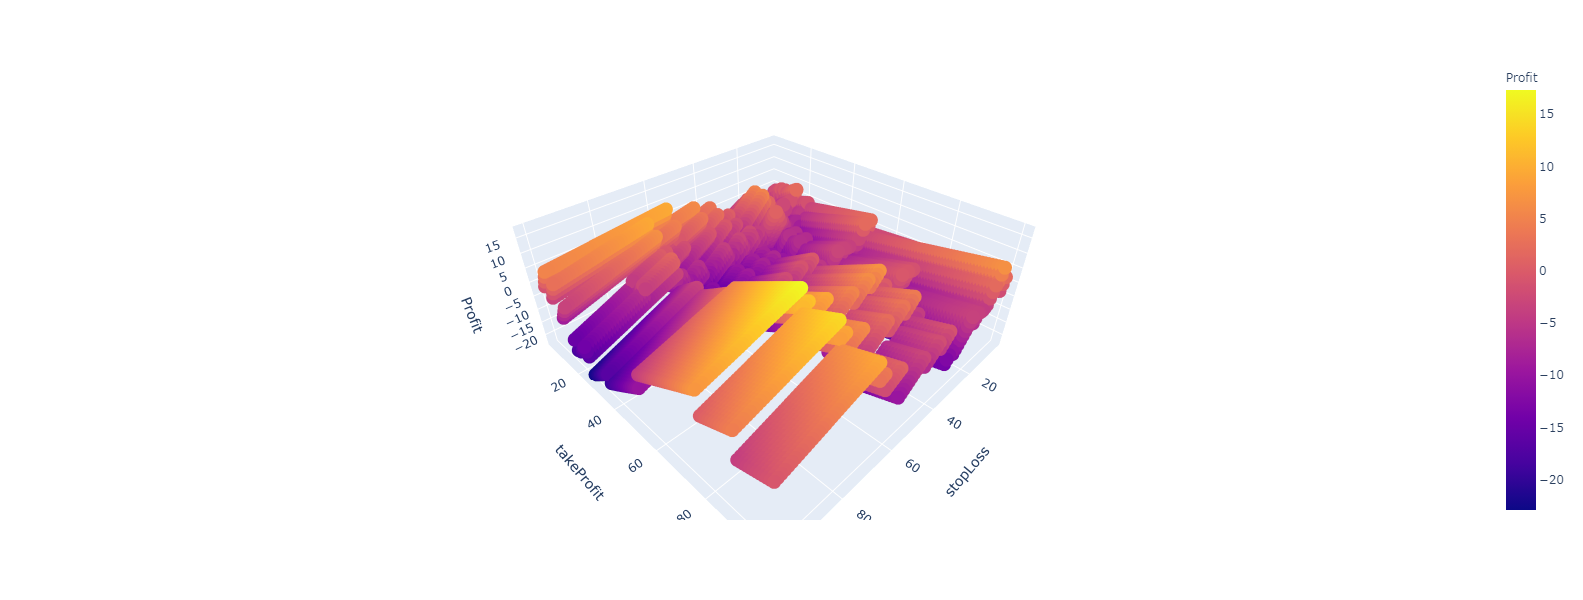

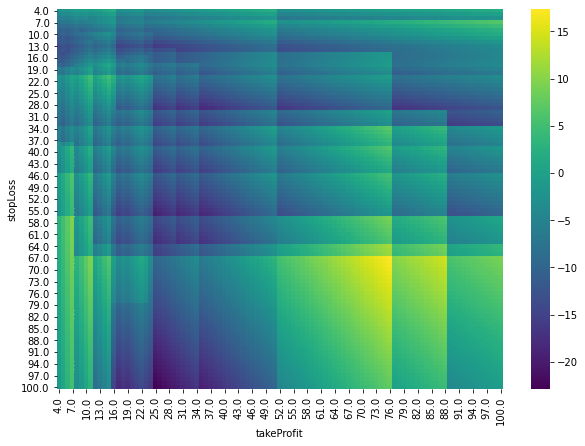

In [18]:
cols= ["stopLoss", "takeProfit", "Profit", "labels"]
uniform_data = pd.crosstab(df[cols[0]],df[cols[1]], values=df[cols[2]], aggfunc="mean")

plt.figure(figsize=(10,7))
ax = sns.heatmap(uniform_data, cmap="viridis", label=True)
ax.plot()
s = px.scatter_3d(data_frame=df, x=cols[0], y=cols[1], z=cols[2], color=cols[2], opacity=1, width=1500, height=600, size_max=0.1)
s.show()

 ### K-means

In [29]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

x = df[cols[:3]].values
stc = StandardScaler()
dat = stc.fit_transform(x)

c:\users\rr\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0.5, 0, 'N Clusters'), Text(0, 0.5, 'Distancia')]

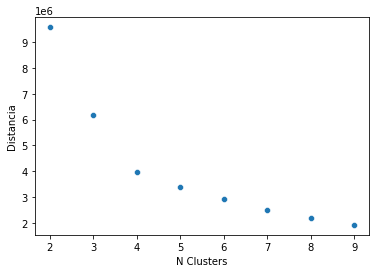

In [30]:
inertias = []
for k in range(2,10):
    clusters = KMeans(k)
    clusters.fit(df[cols[:3]])
    inertias.append(clusters.inertia_)
    
ax =sns.scatterplot(range(2,10), inertias)
ax.set(xlabel="N Clusters", ylabel="Distancia")

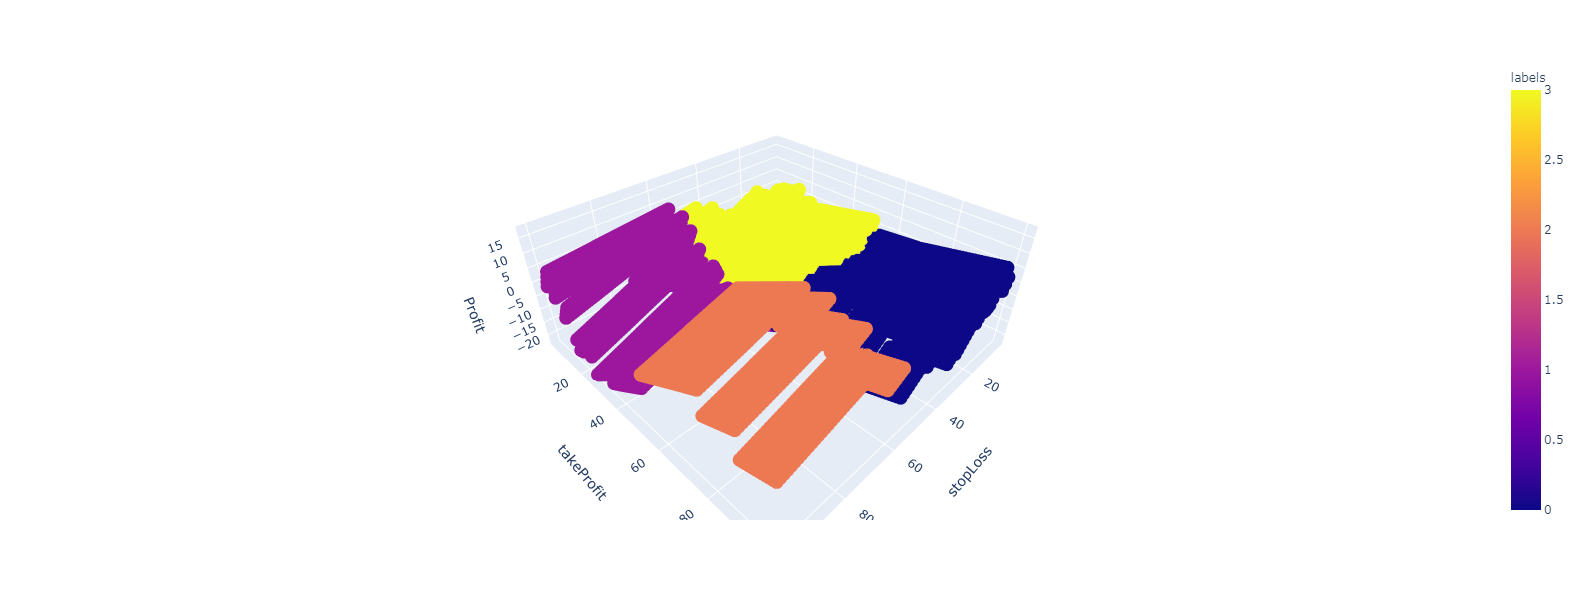

In [32]:
clusters = KMeans(4)
clusters.fit(x)

centros = clusters.cluster_centers_
labels = clusters.labels_.reshape(-1,1)

df["labels"] = labels
s = px.scatter_3d(data_frame=df, x=cols[0], y=cols[1], z=cols[2], color=cols[3], opacity=1, width=1500, height=600, size_max=0.1)
s.show()

In [33]:
for i,c in enumerate(centros):
    print("Cluster {}, Stoploss={:.0f}, Takeprofit={:.0f}, Profit={:.3f}".format(i, c[0], c[1], c[2]))

Cluster 0, Stoploss=30, Takeprofit=77, Profit=-5.041
Cluster 1, Stoploss=76, Takeprofit=28, Profit=-7.439
Cluster 2, Stoploss=78, Takeprofit=76, Profit=4.703
Cluster 3, Stoploss=27, Takeprofit=28, Profit=-7.426
